In [1]:
import pandas as pd
import numpy as np
import re
import jieba
import matplotlib.pyplot as plt



In [3]:
# remove essays without scores and contents
#train_data = pd.read_excel(r'C:\Users\dawns\Desktop\Master thesis\data\Dataset_L1 learner_multitopic.xlsx',index_col=None, header=0)
#train_data.dropna(axis=0, how='any', inplace=True)
#train_data

In [2]:

train_data = pd.read_excel(r'C:\Users\dawns\Desktop\Master thesis\data\L1_randomselect.xlsx',index_col=None, header=0)
train_data



,Unnamed: 0,id,student_id,title,content,create_time,content_length,gradeid,classid
0,69,f2d25baca89511eaa65b54e1ad63dcde,1301,蜗牛，贝壳和仙人掌成为好朋友,一个阳光名为的早晨，天气非常晴朗，还阳光灿烂，蜗牛带着贝壳上海滩，贝壳是蜗牛的家，有人攻击他...,2019-07-01,292,G01,13
1,3375,c7c6d730a92c11eaa65b54e1ad63dcde,1443,羽毛的主人,在一座大山脚下，有一座小木屋，那里住着小乌龟贝贝一家，他有一个碧绿碧绿的贝壳， 还以有一双大...,2017-07-04,451,G01,14
2,7906,0c0e1794a94411eaa65b54e1ad63dcde,3272,奇异的手机,在星期五的晚上小双放学了，在路上走着。突然，一个手机出现在他的脚下。这只手机不仅形状奇特，而...,2012-07-02,581,G03,32
3,213,f445ec8ea89511eaa65b54e1ad63dcde,2344,我是一只毒蛇,当一只毒蛇好不好，当一只毒蛇一点也不好，因为每天还要去找食物吃，还得保护我们的孩子，我的朋友...,2019-07-01,551,G02,23
4,4715,66ceaebfa93611eaa65b54e1ad63dcde,4228,痛苦的六一,六一儿童节，是孩子们最欢快的节日，要是我的话，就会坐着火车到大连或者北京或者三亚，痛痛快快的...,2016-12-16,1121,G04,42
...,...,...,...,...,...,...,...,...,...
3663,4871,67b5bc66a93611eaa65b54e1ad63dcde,5134,我们要独立,现在，中国的小孩子，经常不独立，简单来说就是衣来伸手饭来张口，有一个漫画上就是这样。\n...,2016-12-16,856,G05,51
3664,2186,688769fda89811eaa65b54e1ad63dcde,4314,如此示范,在一个阳光明媚的一天，一对父子在马路上行走，他们会发生什么事呢？此时隔离杆那边，有很多汽车…...,2018-07-04,691,G04,43
3665,8097,02b7acc9a94611eaa65b54e1ad63dcde,1451,小老鼠吃西瓜,天气晴朗，阳光明媚，瓦蓝瓦蓝的天动飘着朵朵白云。\n星期天，小老鼠就来到小河边，看见草地上有...,2011-07-01,331,G01,14
3666,782,09f7d08da89611eaa65b54e1ad63dcde,1101,大意的小兔子,在一个春天，天气格外晴朗，小鸟在枝头上唱歌，小草变绿了，小河清澈见底，实在是美丽极了。小兔子...,2018-12-21,475,G01,11


In [3]:
count = train_data.loc[:, 'title'].value_counts()
count
print(len(count))

1672


In [4]:
# Word cut
#  Word cut
train_data['WORDCUT'] = train_data['content']
def cut_word(content):
    cw = jieba.cut(content)
    return ' '.join(cw)
train_data['WORDCUT'] = train_data['WORDCUT'].apply(cut_word)
train_data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dawns\AppData\Local\Temp\jieba.cache
Loading model cost 1.000 seconds.
Prefix dict has been built successfully.


,Unnamed: 0,id,student_id,title,content,create_time,content_length,gradeid,classid,WORDCUT
0,69,f2d25baca89511eaa65b54e1ad63dcde,1301,蜗牛，贝壳和仙人掌成为好朋友,一个阳光名为的早晨，天气非常晴朗，还阳光灿烂，蜗牛带着贝壳上海滩，贝壳是蜗牛的家，有人攻击他...,2019-07-01,292,G01,13,一个 阳光 名为 的 早晨 ， 天气 非常 晴朗 ， 还 阳光灿烂 ， 蜗牛 带 着 贝壳 ...
1,3375,c7c6d730a92c11eaa65b54e1ad63dcde,1443,羽毛的主人,在一座大山脚下，有一座小木屋，那里住着小乌龟贝贝一家，他有一个碧绿碧绿的贝壳， 还以有一双大...,2017-07-04,451,G01,14,在 一座 大 山脚下 ， 有 一座 小木屋 ， 那里 住 着 小 乌龟 贝贝 一家 ， 他 ...
2,7906,0c0e1794a94411eaa65b54e1ad63dcde,3272,奇异的手机,在星期五的晚上小双放学了，在路上走着。突然，一个手机出现在他的脚下。这只手机不仅形状奇特，而...,2012-07-02,581,G03,32,在 星期五 的 晚上 小双 放学 了 ， 在 路上 走 着 。 突然 ， 一个 手机 出现 ...
3,213,f445ec8ea89511eaa65b54e1ad63dcde,2344,我是一只毒蛇,当一只毒蛇好不好，当一只毒蛇一点也不好，因为每天还要去找食物吃，还得保护我们的孩子，我的朋友...,2019-07-01,551,G02,23,当 一只 毒蛇 好不好 ， 当 一只 毒蛇 一点 也 不好 ， 因为 每天 还要 去 找 食...
4,4715,66ceaebfa93611eaa65b54e1ad63dcde,4228,痛苦的六一,六一儿童节，是孩子们最欢快的节日，要是我的话，就会坐着火车到大连或者北京或者三亚，痛痛快快的...,2016-12-16,1121,G04,42,六一 儿童节 ， 是 孩子 们 最 欢快 的 节日 ， 要是 我 的话 ， 就 会 坐 着 ...


In [5]:
# count the number of words in whole text
#train_data['WORDCUT']  
words = train_data['WORDCUT'].values.tolist()
#words
words_str = re.sub('\W*', '',''.join(words))
#words_str
wordslist = list(jieba.cut(words_str))
#wordslist
print('Total number of tokens:',len(wordslist))

Total number of tokens: 1224713


In [6]:
# load connective corpus
data = pd.read_excel(r'C:\Users\dawns\Desktop\Master thesis\data\connectives corpus simplify.xlsx',index_col=None,header=0)
list1 = data.values.tolist()
a = np.array(list1)
#list1   
# flatten,remove nan and punction
list2 = a.flatten()
list2 = list2.tolist()
while 'nan' in list2:
    list2.remove('nan')
# list2
#list3 = re.sub('\W*', '',''.join(list2))   #Finally find that do not need to resub punctuation.
#list3
#list4=list(jieba.cut(list3,use_paddle=True))
#will not use jieba.cut for connectives_corpus since that will cause mistake in those two words"反之”“所以”.
connective_list=list2
#connective_list
print('Number of connective words dictionary:',len(connective_list))     


Number of connective words dictionary: 221


In [7]:
print(connective_list,end="")

['跟', '便', '并', '既然', '不是', '果然', '像', '即使', '别说', '凡是', '免得', '除了', '和', '此外', '并非', '加上', '便是', '果真', '好比', '即令', '并且', '方才', '以免', '除开', '还有', '而', '诚然', '加以', '乃是', '假如', '如同', '尽管', '不单', '除非', '为的是', '到底', '或者', '刚', '但', '结果', '还是', '假若', '似乎', '尽管如此', '不但', '只要', '为了', '反正', '及', '换言之', '但是', '因为', '或', '假使', '等于', '就是', '而且', '不管', '一来', '不然', '既', '即', '虽然', '看样子', '或是', '如果', '不如', '就算', '不光', '任凭', '一则', '单', '连', '继而', '反倒', '然则', '宁', '如', '不及', '哪怕', '不仅', '无论', '以便', '综上所述', '一方面', '接着', '反而', '所以', '宁可', '若', '不比', '愈', '何况', '终归', '以防', '由此可见', '且', '进而', '反之', '惟其', '宁肯', '设若', '固然', '不惟', '终究', '免得', '也就是说', '时而', '紧接着', '否则', '惟有', '宁愿', '倘若', '纵然', '不仅仅', '总归', '省得', '总之', '同时', '就', '可是', '幸而', '绝不', '倘', '而况', '不论', '以免', '起先', '同样', '可见', '可惜', '才', '抑或', '倘使', '非但', '为', '譬如', '一边', '另外', '明明', '幸好', '毋宁', '万一', '况且', '起初', '一会', '每当', '明知', '幸亏', '兴许', '要不是', '尚且', '后来', '一面', '每逢', '其实', '以至于', '许是', '一旦', '光', '例如', '以及', '乃', '恰恰相反', '以至', '要不然', '要是', '甚至

In [9]:
# Sum of connective words in train_data，the most frequency words and the least words
from collections import Counter
Sum_Words = [s for s in wordslist if s in connective_list ]
#Sum_Words
print('Total number of connective words:',len(Sum_Words))
word_counts = Counter(Sum_Words)
#word_counts = sorted(word_counts.items(), key=lambda d:d[1], reverse = True) # sort interable objects
top_twelf = word_counts.most_common(12)
print('The most frequency connective words:',top_twelf)
least_twelf = word_counts.most_common()[:-13:-1]
print('The least frequency connective words:',least_twelf)


Total number of connective words: 74589
The most frequency connective words: [('就', 19054), ('和', 6371), ('又', 5133), ('可是', 3035), ('于是', 2386), ('还有', 2286), ('就是', 2103), ('因为', 2074), ('但是', 2059), ('像', 1842), ('还是', 1703), ('然后', 1640)]
The least frequency connective words: [('不单', 1), ('不及', 1), ('与其', 1), ('乃至', 1), ('纵然', 1), ('加以', 1), ('譬如', 1), ('因而', 1), ('假若', 1), ('每逢', 1), ('此外', 1), ('起先', 1)]


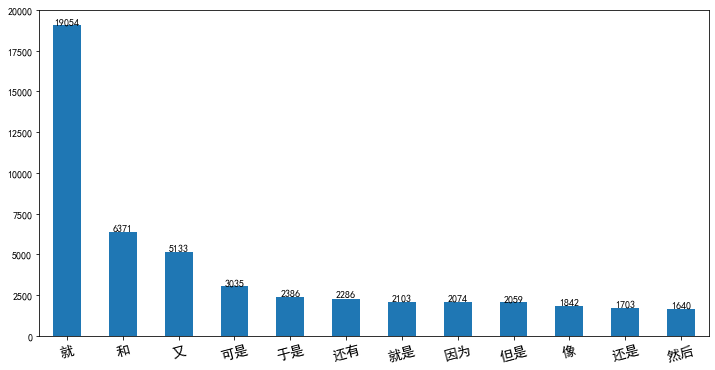

In [10]:
# visualise the most amount of connective words in whole essays
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x_labels = [val[0] for val in top_twelf]
y_labels = [val[1] for val in top_twelf]
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels) 
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=15) 
    plt.tick_params(axis='x', labelsize=14) 

In [11]:
#counter the useage situation in sub-type of connective words
cons = ['Coordinating','Continuing','Inflection','Causal','Choose','Hypothesized','Comparative','Concession','Progressive','Conditions','Purpose','Others']
Sum_sub = []
for con in cons:
    list_con = data[con].values.tolist()
    list_con = [str(x) for x in list_con]
    while 'nan' in list_con:
        list_con.remove('nan')
    subconnectives = [p for p in wordslist if p in list_con ]
    sub_conuts = Counter(subconnectives)
    top_sub5 =  sub_conuts.most_common(5)
    least_sub5 =  sub_conuts.most_common()[:-6:-1]
    print(con)
    print(len(subconnectives))
    print(top_sub5)
    print(least_sub5)
    Sum_sub.append(len(subconnectives))
    #print(subconnectives)
print(Sum_sub)

Coordinating
17289
[('和', 6371), ('又', 5133), ('还有', 2286), ('跟', 1159), ('一会', 770)]
[('或者说', 2), ('及', 17), ('同', 21), ('同样', 31), ('一面', 37)]
Continuing
24737
[('就', 19054), ('然后', 1640), ('而', 1071), ('终于', 973), ('先', 565)]
[('乃至', 1), ('每逢', 1), ('此外', 1), ('随即', 3), ('其次', 5)]
Inflection
8911
[('可是', 3035), ('但是', 2059), ('却', 914), ('但', 601), ('只有', 505)]
[('反之', 2), ('要么', 3), ('恰恰相反', 3), ('反倒', 5), ('虽', 6)]
Causal
8381
[('于是', 2386), ('因为', 2074), ('所以', 1200), ('才', 1116), ('只是', 327)]
[('加以', 1), ('因而', 1), ('只得', 3), ('以至于', 3), ('从而', 9)]
Choose
3334
[('还是', 1703), ('不是', 1199), ('要不然', 266), ('或', 109), ('或是', 29)]
[('与其', 1), ('乃是', 2), ('宁可', 4), ('便是', 6), ('绝不', 7)]
Hypothesized
2893
[('如果', 1460), ('要是', 755), ('假如', 332), ('果然', 136), ('如', 55)]
[('假若', 1), ('倘若', 6), ('若', 7), ('果真', 17), ('一旦', 19)]
Comparative
2109
[('像', 1842), ('不如', 128), ('似乎', 65), ('等于', 31), ('如同', 23)]
[('不及', 1), ('好比', 8), ('不比', 11), ('如同', 23), ('等于', 31)]
Concession
2350
[('就是', 

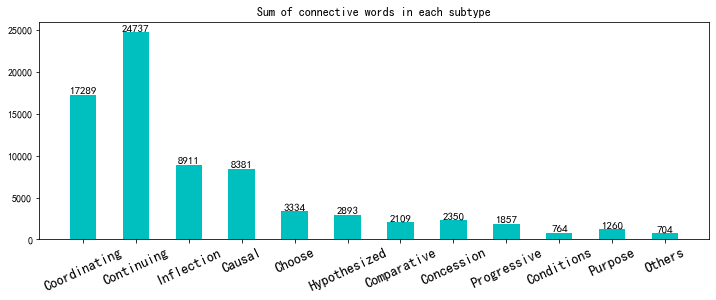

In [13]:
# draw the picture for connective words distribution
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(12,4))
plt.bar(cons,Sum_sub,width=0.5,align='center',color = 'c')
plt.title('Sum of connective words in each subtype')
plt.xticks(rotation=25) 
plt.tick_params(axis='x', labelsize=14) 
for a,b in zip(cons,Sum_sub):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.show()

In [13]:
# Find the amount of connectives in every words level 
Words_level = pd.read_excel(r"C:\Users\dawns\Desktop\Master thesis\data\level of connective words.xlsx",index_col=None, header=0)
#Words_level
levels = ['First','Second','Third','Fourth','Fifth','Sixth','others']

Sum_wordlevel = []
for level in levels:
    level_list1 = Words_level[level].values.tolist()
    level_list1 = [str(x) for x in level_list1]
    while 'nan' in level_list1:
        level_list1.remove('nan')
    #print(level_list1)
    level_match = [l for l in wordslist if l in level_list1 ]
    #print(level_match)
    sub_level = Counter(level_match)
    top_sub3 =  sub_level.most_common(3)
    least_sub3 =  sub_level.most_common()[:-4:-1]
    Sum_wordlevel.append(len(level_match))
    print(level,':',len(level_match),top_sub3,least_sub3)
    #print(level_match)
print(Sum_wordlevel)

First : 6371 [('和', 6371)] [('和', 6371)]
Second : 24864 [('就', 19054), ('因为', 2074), ('但是', 2059)] [('虽然', 477), ('所以', 1200), ('但是', 2059)]
Third : 23163 [('又', 5133), ('就是', 2103), ('像', 1842)] [('不比', 11), ('除了', 63), ('不但', 80)]
Fourth : 11924 [('可是', 3035), ('于是', 2386), ('而', 1071)] [('其次', 5), ('不论', 7), ('例如', 12)]
Fifth : 1848 [('假如', 332), ('便', 309), ('要不然', 266)] [('与其', 1), ('因而', 1), ('何况', 2)]
Sixth : 472 [('明明', 314), ('只不过', 43), ('偏偏', 17)] [('譬如', 1), ('此外', 1), ('况且', 2)]
others : 5036 [('还有', 2286), ('但', 601), ('并', 389)] [('不单', 1), ('不及', 1), ('乃至', 1)]
[6371, 24864, 23163, 11924, 1848, 472, 5036]


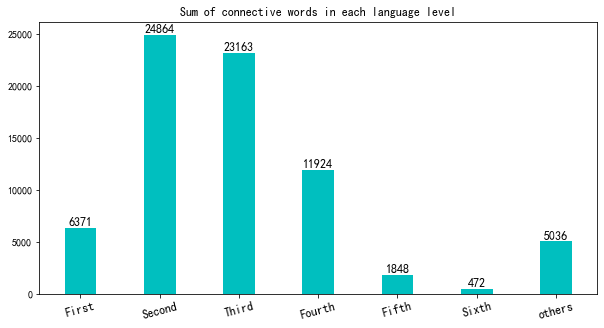

In [14]:
# Visualization of different level of connective words' distribution
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(10,5))
plt.bar(levels,Sum_wordlevel,width=0.4,align='center',color = 'c')
plt.title('Sum of connective words in each language level')
plt.xticks(rotation=15) 
plt.tick_params(axis='x', labelsize=12) 
for a,b in zip(levels,Sum_wordlevel):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
plt.show()

In [15]:
#Find connectvies words in every text
train_data['CONNECTIVES'] = train_data["WORDCUT"]
#connective_list
for i in train_data['CONNECTIVES'].index:
    Single_text = train_data['CONNECTIVES'][i]
    #print(Single_text)
    Match_result = [o for o in connective_list if o in Single_text]
    #print(Match_result,len(Match_result))

In [16]:
#Build new dataframe for every text
words_eachtext = pd.DataFrame()
words_detailed = pd.DataFrame()
for i in train_data['CONNECTIVES'].index:
    Single_text = train_data['CONNECTIVES'][i]
    #print(len(Single_text))
    Match_result = [o for o in connective_list if o in Single_text]
    #print(Match_result,len(Match_result))
    words_eachtext = words_eachtext.append(pd.DataFrame({len(Match_result)}),ignore_index=True)
    words_detailed = words_detailed.append(pd.DataFrame({str(Match_result)}),ignore_index=True)
#words_eachtext.head()
#words_detailed.head()
train_data['CONNECTIVES_DETAILED'] = train_data["WORDCUT"]
train_data['CONNECTIVES NUMBERS'] = train_data["WORDCUT"]
train_data['CONNECTIVES NUMBERS'] = words_eachtext 
train_data['CONNECTIVES_DETAILED'] = words_detailed

C:\Users\dawns\AppData\Local\Temp/ipykernel_9844/1160512377.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_eachtext = words_eachtext.append(pd.DataFrame({len(Match_result)}),ignore_index=True)
C:\Users\dawns\AppData\Local\Temp/ipykernel_9844/1160512377.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_detailed = words_detailed.append(pd.DataFrame({str(Match_result)}),ignore_index=True)


In [17]:
Tokens = pd.DataFrame()
for i in train_data['CONNECTIVES'].index:
    Single_text = train_data['CONNECTIVES'][i]
    Single_text = re.sub('\W*', '',''.join(Single_text))
    Single_text = str(Single_text)
    Single_text = list(jieba.cut(Single_text))
    #print(Single_text)
    Tokens = Tokens.append(pd.DataFrame({len(Single_text)}),ignore_index=True)
train_data['Tokens'] = Tokens 
train_data


C:\Users\dawns\AppData\Local\Temp/ipykernel_9844/2970092753.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tokens = Tokens.append(pd.DataFrame({len(Single_text)}),ignore_index=True)


,Unnamed: 0,id,student_id,title,content,create_time,content_length,gradeid,classid,WORDCUT,CONNECTIVES,CONNECTIVES_DETAILED,CONNECTIVES NUMBERS,Tokens
0,69,f2d25baca89511eaa65b54e1ad63dcde,1301,蜗牛，贝壳和仙人掌成为好朋友,一个阳光名为的早晨，天气非常晴朗，还阳光灿烂，蜗牛带着贝壳上海滩，贝壳是蜗牛的家，有人攻击他...,2019-07-01,292,G01,13,一个 阳光 名为 的 早晨 ， 天气 非常 晴朗 ， 还 阳光灿烂 ， 蜗牛 带 着 贝壳 ...,一个 阳光 名为 的 早晨 ， 天气 非常 晴朗 ， 还 阳光灿烂 ， 蜗牛 带 着 贝壳 ...,"['还是', '就', '为', '光', '又', '然后', '以']",7,155
1,3375,c7c6d730a92c11eaa65b54e1ad63dcde,1443,羽毛的主人,在一座大山脚下，有一座小木屋，那里住着小乌龟贝贝一家，他有一个碧绿碧绿的贝壳， 还以有一双大...,2017-07-04,451,G01,14,在 一座 大 山脚下 ， 有 一座 小木屋 ， 那里 住 着 小 乌龟 贝贝 一家 ， 他 ...,在 一座 大 山脚下 ， 有 一座 小木屋 ， 那里 住 着 小 乌龟 贝贝 一家 ， 他 ...,"['不是', '和', '而', '还是', '就是', '而且', '且', '就', '...",11,227
2,7906,0c0e1794a94411eaa65b54e1ad63dcde,3272,奇异的手机,在星期五的晚上小双放学了，在路上走着。突然，一个手机出现在他的脚下。这只手机不仅形状奇特，而...,2012-07-02,581,G03,32,在 星期五 的 晚上 小双 放学 了 ， 在 路上 走 着 。 突然 ， 一个 手机 出现 ...,在 星期五 的 晚上 小双 放学 了 ， 在 路上 走 着 。 突然 ， 一个 手机 出现 ...,"['和', '而', '而且', '连', '不仅', '接着', '且', '紧接着', ...",15,303
3,213,f445ec8ea89511eaa65b54e1ad63dcde,2344,我是一只毒蛇,当一只毒蛇好不好，当一只毒蛇一点也不好，因为每天还要去找食物吃，还得保护我们的孩子，我的朋友...,2019-07-01,551,G02,23,当 一只 毒蛇 好不好 ， 当 一只 毒蛇 一点 也 不好 ， 因为 每天 还要 去 找 食...,当 一只 毒蛇 好不好 ， 当 一只 毒蛇 一点 也 不好 ， 因为 每天 还要 去 找 食...,"['和', '还有', '因为', '就是', '就', '为', '一会', '要是', ...",11,284
4,4715,66ceaebfa93611eaa65b54e1ad63dcde,4228,痛苦的六一,六一儿童节，是孩子们最欢快的节日，要是我的话，就会坐着火车到大连或者北京或者三亚，痛痛快快的...,2016-12-16,1121,G04,42,六一 儿童节 ， 是 孩子 们 最 欢快 的 节日 ， 要是 我 的话 ， 就 会 坐 着 ...,六一 儿童节 ， 是 孩子 们 最 欢快 的 节日 ， 要是 我 的话 ， 就 会 坐 着 ...,"['并', '既然', '和', '还有', '而', '或者', '但', '还是', '...",29,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,4871,67b5bc66a93611eaa65b54e1ad63dcde,5134,我们要独立,现在，中国的小孩子，经常不独立，简单来说就是衣来伸手饭来张口，有一个漫画上就是这样。\n...,2016-12-16,856,G05,51,现在 ， 中国 的 小孩子 ， 经常 不 独立 ， 简单 来说 就是 衣来伸手 饭来...,现在 ， 中国 的 小孩子 ， 经常 不 独立 ， 简单 来说 就是 衣来伸手 饭来...,"['即使', '和', '但', '还是', '只要', '但是', '因为', '就是',...",28,460
3664,2186,688769fda89811eaa65b54e1ad63dcde,4314,如此示范,在一个阳光明媚的一天，一对父子在马路上行走，他们会发生什么事呢？此时隔离杆那边，有很多汽车…...,2018-07-04,691,G04,43,在 一个 阳光明媚 的 一天 ， 一对 父子 在 马路上 行走 ， 他们 会 发生 什么 事...,在 一个 阳光明媚 的 一天 ， 一对 父子 在 马路上 行走 ， 他们 会 发生 什么 事...,"['既然', '不是', '像', '和', '而', '但', '及', '但是', '因...",29,373
3665,8097,02b7acc9a94611eaa65b54e1ad63dcde,1451,小老鼠吃西瓜,天气晴朗，阳光明媚，瓦蓝瓦蓝的天动飘着朵朵白云。\n星期天，小老鼠就来到小河边，看见草地上有...,2011-07-01,331,G01,14,天气晴朗 ， 阳光明媚 ， 瓦蓝瓦 蓝 的 天动 飘 着 朵朵 白云 。 \n 星期天 ， ...,天气晴朗 ， 阳光明媚 ， 瓦蓝瓦 蓝 的 天动 飘 着 朵朵 白云 。 \n 星期天 ， ...,"['就', '才', '光', '以']",4,167
3666,782,09f7d08da89611eaa65b54e1ad63dcde,1101,大意的小兔子,在一个春天，天气格外晴朗，小鸟在枝头上唱歌，小草变绿了，小河清澈见底，实在是美丽极了。小兔子...,2018-12-21,475,G01,11,在 一个 春天 ， 天气 格外 晴朗 ， 小鸟 在 枝头 上 唱歌 ， 小草 变绿 了 ， ...,在 一个 春天 ， 天气 格外 晴朗 ， 小鸟 在 枝头 上 唱歌 ， 小草 变绿 了 ， ...,"['和', '就']",2,226


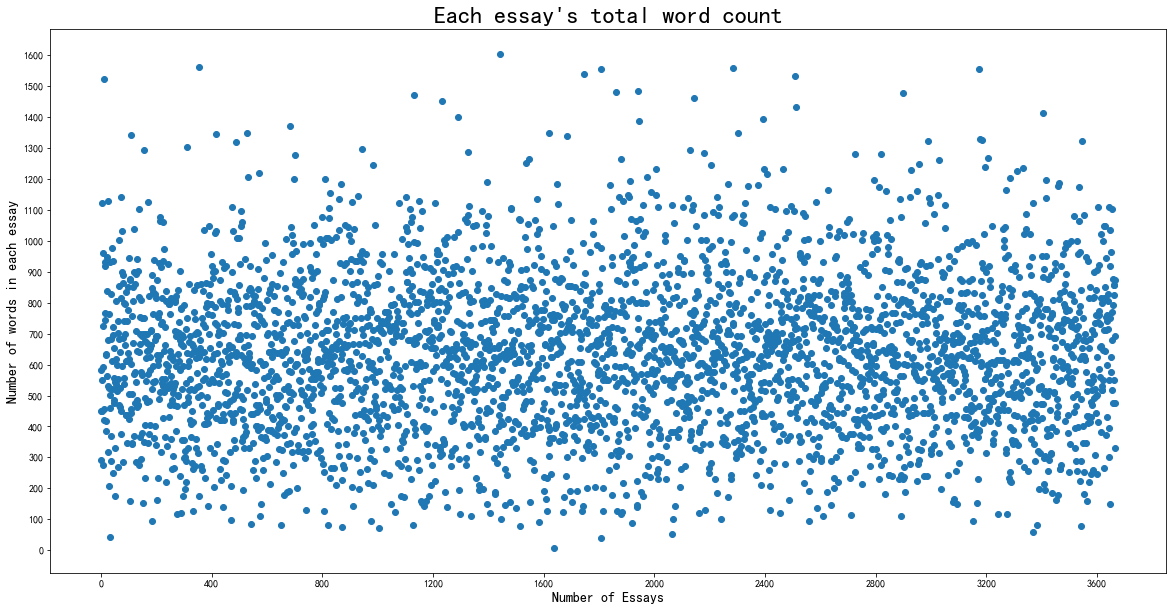

In [18]:
# scatter map for dataset
from matplotlib.pyplot import MultipleLocator
y_list = train_data['content_length'].values.tolist()
x_list =np.array(y_list)
x_list = np.array(list(range(3668)))
x_list
plt.figure(figsize=(20, 10))
x_major_locator=MultipleLocator(400)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(100)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数

plt.xlabel('Number of Essays',fontsize=14)
plt.ylabel('Number of words in each essay',fontsize=14)
plt.title("Each essay's total word count",fontsize=24)
plt.scatter(x_list, y_list)
plt.show()

In [19]:
train_data.to_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Data_L1.csv')